In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex
import numpy as np

import glob
frac = 0.01
# path ='./data/RFReg_' # use your path
path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
allFiles

['./../data/Pobreza/pobreza_0.01_q2010-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-08-15.csv',
 './../data/Pobreza/pobreza_0.0

In [4]:
cpi_M = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_M.csv', index_col=0)
cpi_M.index = pd.to_datetime(cpi_M.index)

cpi_Q = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_Q.csv', index_col=0)
cpi_Q.index = pd.to_datetime(cpi_Q.index)

cpi_actual = cpi_M.loc['2022-05']['index'][0]
cpi_2010Q4 = cpi_Q.loc['2010-11']['index'][0]
cpi_ref = cpi_M.loc['2016-01']['index'][0]

In [5]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [6]:
# df_list = []
# for f in allFiles:
#     print(f)
    
f = './../data/Pobreza/pobreza_0.01_q2010-11-15.csv'
groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
vars_ = ['INGRESO', 'P47T_persona']

data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
data = data.merge(aglo_labels)
data['AGLO_si'] = data.AGLOMERADO != 0
data['Total'] = True

data = data.loc[data.AGLO_si == 1]

data.loc[data.INGRESO == 0, 'decil_P47T'] = 'sin ingresos'
data.loc[data.INGRESO == 1, 'P47T_persona'] = data.loc[data.INGRESO == 1, 'P47T_persona'] + np.random.uniform(0, .01, data.INGRESO.sum())
data.loc[data.INGRESO == 1, 'decil_P47T'] = pd.qcut(data.loc[data.INGRESO == 1, 'P47T_persona'], q = 10, labels = range(1, 11))

data['Q'] = pd.to_datetime(data['Q'])
# df104 = df.loc[df.Q == '2010-11-15']

In [7]:
# df104 = df.loc[df.Q == '2010-11-15']

In [8]:
# pd.read_csv(f, nrows = 5).T

In [9]:
## Tabla:

# Personas con ingresos (aprox 14.377, sin ingresos 10.510 para un total de 24.887 en aglos)


In [10]:
tabla = data.groupby(['decil_P47T']).agg({'P47T_persona': ['min', 'max', 'size', 'sum', 'mean']})['P47T_persona']
tabla[['min', 'max', 'sum', 'mean']] = tabla[['min', 'max', 'sum', 'mean']]*(cpi_2010Q4/cpi_ref)
tabla[['size', 'sum']] = 100*tabla[['size', 'sum']]
tabla['pct'] = 100*tabla['sum']/tabla['sum'].sum()
tabla.loc['Total'] = tabla.iloc[:-1].agg({'min': 'min', 'max': 'max','size': 'sum', 'sum': 'sum', 'mean': 'mean', 'pct': 'sum'})

tabla[['min', 'max', 'sum', 'mean']] = tabla[['min', 'max', 'sum', 'mean']].round(-1).astype(int)
tabla['size'] = (tabla['size']/1e3).round(1)
tabla['sum'] = (tabla['sum']/1e6).round(1)
tabla['pct'] = tabla['pct'].round(1)
tabla.columns = ['Mínimo', 'Máximo', 'Población (miles)', 'Ingresos (mill. ARS)', 'Media', '% de suma de ingresos']
tabla

,Mínimo,Máximo,Población (miles),Ingresos (mill. ARS),Media,% de suma de ingresos
decil_P47T,,,,,,
1,30,500,1555.1,511.8,330,1.4
2,500,800,1555.0,1045.2,670,2.8
3,800,1040,1555.0,1463.5,940,3.9
4,1040,1400,1555.0,1862.3,1200,5.0
5,1400,1750,1555.1,2406.2,1550,6.5
6,1750,2030,1555.0,3008.3,1930,8.1
7,2030,2700,1555.0,3754.9,2410,10.1
8,2700,3500,1555.0,4729.8,3040,12.7
9,3500,5000,1555.0,6422.1,4130,17.2


## Series de tiempo

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01

path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
# allFiles


def moving_avg(table):
    ## Label left. The roilling means are centered nearly on the right date, although one day early.
    # i.e. 2009-12-31 is the average for 07-2009 to 06-2010
    return table.resample('Q', label = 'left').mean().interpolate('linear').rolling(4, center = True).mean()


In [12]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [13]:
# Percentile funcs
def q10(x):
    return x.quantile(0.1)

def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

def q90(x):
    return x.quantile(0.9)

# Series de Tiempo. Hogares

In [14]:
# Stats a nivel Hogar

mon_cols = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IPCF']

df_list = []
for f in allFiles:
    print(f)
    
    vars_ = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IX_TOT']
    data = pd.read_csv(f, usecols = ['HOGAR_REF_ID', 'Q', 'AGLOMERADO'] + vars_)
    data = data.loc[data.AGLOMERADO != 0]
    data = data.drop_duplicates()
    
    data['IPCF'] = data['P47T_hogar']/data['IX_TOT']
    
    table = data.groupby(['Q'])[mon_cols].agg(['mean', q10, q25, 'median', q75, q90])

    df_list += [table]
    
df = pd.concat(df_list)
df.index = pd.to_datetime(df.index)
# df10 = df.loc[df.Q.dt.year == 2010]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv
./../data/Pobreza/pobreza_0.01_q2012-02-15.csv
./../data/Pobreza/pobreza_0.01_q2012-05-15.csv
./../data/Pobreza/pobreza_0.01_q2012-08-15.csv
./../data/Pobreza/pobreza_0.01_q2012-11-15.csv
./../data/Pobreza/pobreza_0.01_q2013-02-15.csv
./../data/Pobreza/pobreza_0.01_q2013-05-15.csv
./../data/Pobreza/pobreza_0.01_q2013-08-15.csv
./../data/Pobreza/pobreza_0.01_q2013-11-15.csv
./../data/Pobreza/pobreza_0.01_q2014-02-15.csv
./../data/Pobreza/pobreza_0.01_q2014-05-15.csv
./../data/Pobreza/pobreza_0.01_q2014-08-15.csv
./../data/Pobreza/pobreza_0.01_q2014-11-15.csv
./../data/Pobreza/pobreza_0.01_q2015-02-15.csv
./../data/Pob

In [15]:
## INDICE DE PRECIOS - CONVERSION A VALOR CONSTANTE

cpi_M = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_M.csv', index_col=0)
cpi_M.index = pd.to_datetime(cpi_M.index)

from datetime import datetime as dt
  
# Getting current date and time
today = dt.today()
ref = '2016-01'

cpi_actual = cpi_M.loc[today.strftime("%Y-%m")]['index'][0]
cpi_ref = cpi_M.loc[ref]['index'][0]

df_ARShoy = df*(cpi_actual/cpi_ref)

In [16]:
import matplotlib.ticker as mtick

def moving_avg(table):
    ## Label left. The roilling means are centered nearly on the right date, although one day early.
    # i.e. 2009-12-31 is the average for 07-2009 to 06-2010
    return table.resample('QS').mean().interpolate('linear').rolling(4, center = True).mean()


## Ingreso Total Familiar y Canastas. 

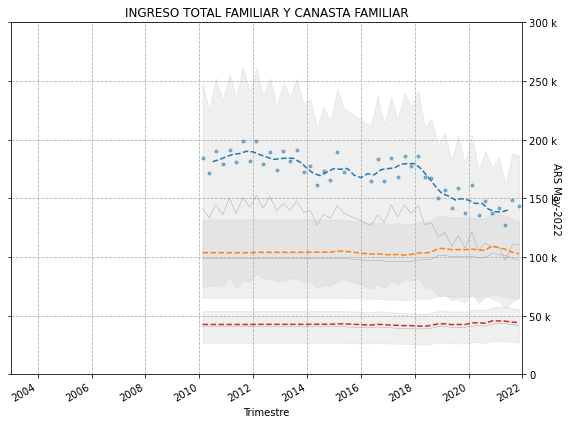

In [122]:
fig, ax = plt.subplots(1, figsize = (8, 6))

colors = ['#1f77b4', '#ff7f0e', '#d62728']

data = df_ARShoy
for i, v in enumerate(['P47T_hogar', 'CBT', 'CBA']):
    c = colors[i]
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    
    if v == 'P47T_hogar':
        moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
        data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
        
    else:
        data[v]['mean'].plot(ax =ax, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('INGRESO TOTAL FAMILIAR Y CANASTA FAMILIAR')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 3e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Ingreso TF')
pts2 = mlines.Line2D([], [], color=colors[1], lw = 2, label='CB total')
pts3 = mlines.Line2D([], [], color=colors[2], lw = 2, label='CB alimentaria')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, pts3, meanLine, medianLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso1.png')
plt.show()

## Ingreso Per Capita Familiar y Canastas. 

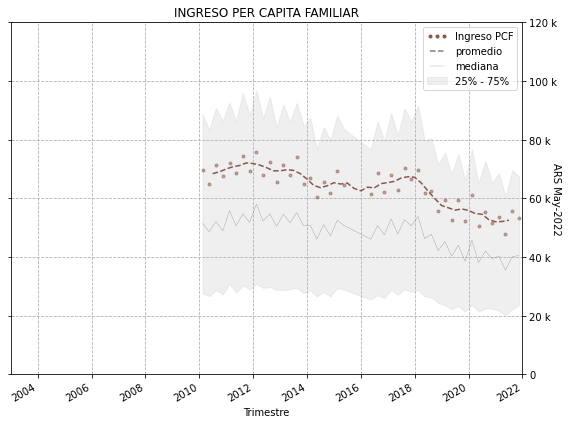

In [120]:
fig, ax = plt.subplots(1, figsize = (8, 6))

colors = ['#8c564b']

for i, (data, v) in enumerate([(df_ARShoy, 'IPCF')]):
    c = colors[i]
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('INGRESO PER CAPITA FAMILIAR')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.2e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Ingreso PCF')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, meanLine, medianLine, grayPatch], numpoints = 3)

############
plt.tight_layout()
plt.savefig('./../images/ingreso2.png')
plt.show()

# Series de Tiempo. Hogares en Pobreza e Indigencia

In [23]:
# Stats Hogares en Pobreza e Indigencia

df_listP = []
df_listI = []
for f in allFiles:
    print(f)
    
    vars_ = ['Pobreza', 'Indigencia', 'P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IX_TOT']
    data = pd.read_csv(f, usecols = ['HOGAR_REF_ID', 'Q', 'AGLOMERADO'] + vars_)
    data = data.loc[data.AGLOMERADO != 0]
    data = data.drop_duplicates()
    data['IPCF'] = data['P47T_hogar']/data['IX_TOT']
    
    dataP = data.loc[data.Pobreza == True]
    tableP = dataP.groupby(['Q'])[mon_cols].agg(['mean', q10, q25, 'median', q75, q90])
    df_listP += [tableP]
    
    dataI = data.loc[data.Indigencia == True]
    tableI = dataI.groupby(['Q'])[mon_cols].agg(['mean', q10, q25, 'median', q75, q90])
    df_listI += [tableI]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv
./../data/Pobreza/pobreza_0.01_q2012-02-15.csv
./../data/Pobreza/pobreza_0.01_q2012-05-15.csv
./../data/Pobreza/pobreza_0.01_q2012-08-15.csv
./../data/Pobreza/pobreza_0.01_q2012-11-15.csv
./../data/Pobreza/pobreza_0.01_q2013-02-15.csv
./../data/Pobreza/pobreza_0.01_q2013-05-15.csv
./../data/Pobreza/pobreza_0.01_q2013-08-15.csv
./../data/Pobreza/pobreza_0.01_q2013-11-15.csv
./../data/Pobreza/pobreza_0.01_q2014-02-15.csv
./../data/Pobreza/pobreza_0.01_q2014-05-15.csv
./../data/Pobreza/pobreza_0.01_q2014-08-15.csv
./../data/Pobreza/pobreza_0.01_q2014-11-15.csv
./../data/Pobreza/pobreza_0.01_q2015-02-15.csv
./../data/Pob

In [24]:
dfHpob = pd.concat(df_listP)
dfHind = pd.concat(df_listI)

dfHpob.index = pd.to_datetime(dfHpob.index)
dfHind.index = pd.to_datetime(dfHind.index)

dfHpob_ARShoy = dfHpob*(cpi_actual/cpi_ref)
dfHind_ARShoy = dfHind*(cpi_actual/cpi_ref)

## Brechas de Pobreza e Indigencia

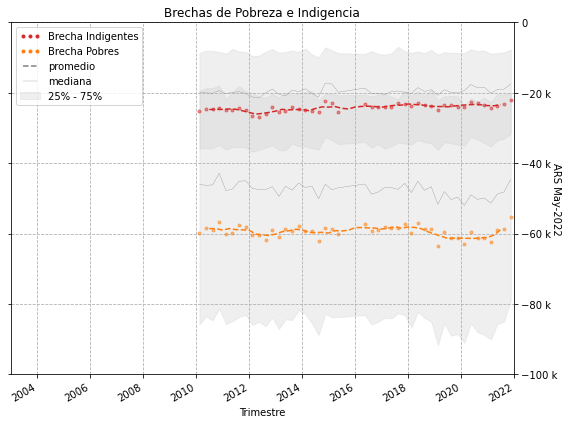

In [119]:
fig, ax = plt.subplots(1, figsize = (8, 6))

colors = ['#d62728', '#ff7f0e']

for i, (data, v) in enumerate([(dfHind_ARShoy, 'gap_indigencia'), (dfHpob_ARShoy, 'gap_pobreza')]):
    c = colors[i]
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('Brechas de Pobreza e Indigencia')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(-1e5, 0) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Brecha Indigentes')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='Brecha Pobres')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, meanLine, medianLine, grayPatch], numpoints = 3)

############
plt.tight_layout()
plt.savefig('./../images/ingreso3.png')
plt.show()

In [28]:
df_list2D = []

for f in allFiles:
    df_list = []
    
    print(f)
    cat_vars = ['Pobreza', 'Indigencia', 'CAT_OCUP', 'CAT_INAC', 'P02', 'INGRESO', 'INGRESO_JUB', 'Grupo_Etario_INDEC', 'PP07K']
    vars_ = ['P47T_persona']
    
    data = pd.read_csv(f, usecols = ['Q', 'AGLOMERADO'] + cat_vars + vars_)
    data = data.loc[data.AGLOMERADO != 0]
    
    for cat_v in cat_vars:
        table = data.groupby(['Q', cat_v])['P47T_persona'].agg(['mean', q10, q25, 'median', q75, q90])
        df_list += [table]
        
    df_list2D += [df_list]
    
dfs = np.array(df_list2D)

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv
./../data/Pobreza/pobreza_0.01_q2012-02-15.csv
./../data/Pobreza/pobreza_0.01_q2012-05-15.csv
./../data/Pobreza/pobreza_0.01_q2012-08-15.csv
./../data/Pobreza/pobreza_0.01_q2012-11-15.csv
./../data/Pobreza/pobreza_0.01_q2013-02-15.csv
./../data/Pobreza/pobreza_0.01_q2013-05-15.csv
./../data/Pobreza/pobreza_0.01_q2013-08-15.csv
./../data/Pobreza/pobreza_0.01_q2013-11-15.csv
./../data/Pobreza/pobreza_0.01_q2014-02-15.csv
./../data/Pobreza/pobreza_0.01_q2014-05-15.csv
./../data/Pobreza/pobreza_0.01_q2014-08-15.csv
./../data/Pobreza/pobreza_0.01_q2014-11-15.csv
./../data/Pobreza/pobreza_0.01_q2015-02-15.csv
./../data/Pob

<ipython-input-28-406af61012cd>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dfs = np.array(df_list2D)


In [29]:
## Create tables for plotting next

for i, cat_v_tables in enumerate(list(dfs.T)):
    cat_var = cat_vars[i] 
    
    table = pd.concat(cat_v_tables)
    table = table.stack().unstack([-2, -1])
    table.index = pd.to_datetime(table.index)
    table = table*(cpi_actual/cpi_ref)
    
    globals()['table_' + cat_var] = table

## Personas con Ingreso

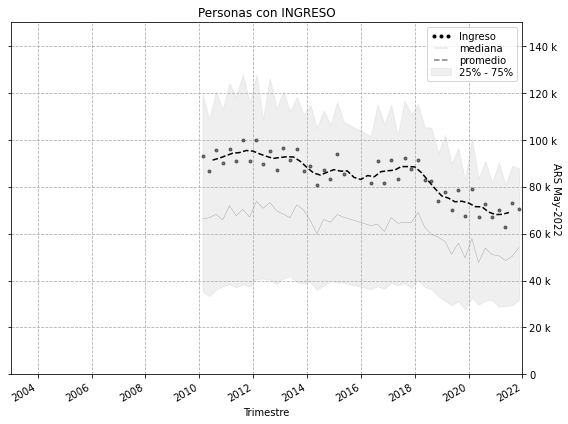

In [118]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## INGRESO == 1
data = table_INGRESO; v = 1; ## Tabla y valor de la categoria en cuestion
c = 'k'
ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('Personas con INGRESO')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color='k', lw = 0, label='Ingreso')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, medianLine, meanLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso4.png')
plt.show()

## Personas con Ingreso. Grupos etarios y Jubilados.

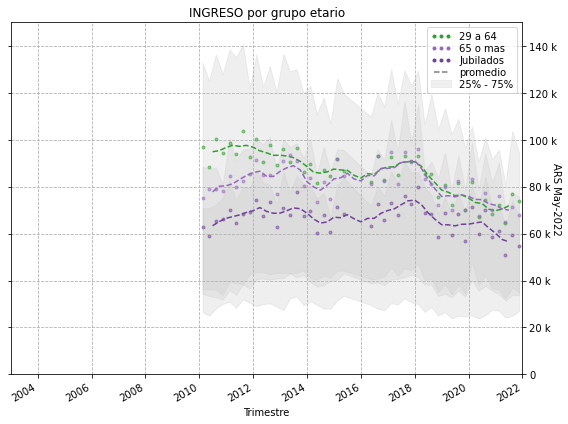

In [117]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## GRUPOS ETARIOS
data = table_Grupo_Etario_INDEC; 

colors = ['#2ca02c', '#9467bd', '#6e4196']
for i, v in enumerate(['(29, 64]', '(64, 110]']):
    c = colors[i]
    
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
#     data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## CAT_INAC == JUBILADOS
data = table_CAT_INAC; v = 1; ## Tabla y valor de la categoria en cuestion
c = colors[2]
ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
# data[v]['median'].plot(ax =ax, color = c, lw = .3)
moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('INGRESO por grupo etario')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='29 a 64')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='65 o mas')
pts3 = mlines.Line2D([], [], marker = '.', color=colors[2], lw = 0, label='Jubilados')
# medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, pts3, meanLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso5.png')
plt.show()

## Ingresos por condicion de Pobreza / Indigencia

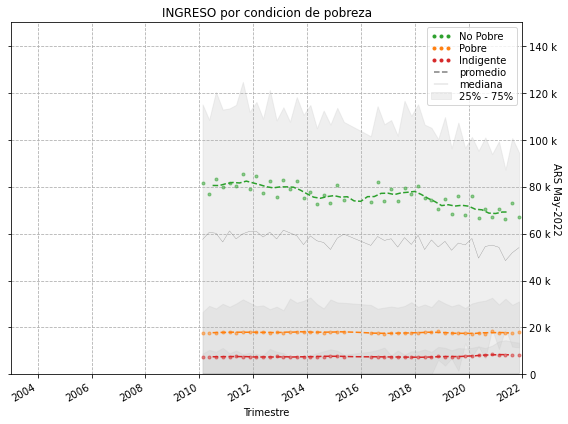

In [116]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## CAT_INAC == JUBILADOS
colors = ['#2ca02c', '#ff7f0e', '#d62728']
for i, (data, v) in enumerate([(table_Pobreza, 0), (table_Pobreza, 1), (table_Indigencia, 1)]):
    c = colors[i]

    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')

## Plot Format
ax.set_title('INGRESO por condicion de pobreza')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='No Pobre')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='Pobre')
pts3 = mlines.Line2D([], [], marker = '.', color=colors[2], lw = 0, label='Indigente')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, pts3, meanLine, medianLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso6.png')
plt.show()

## Ingresos por genero

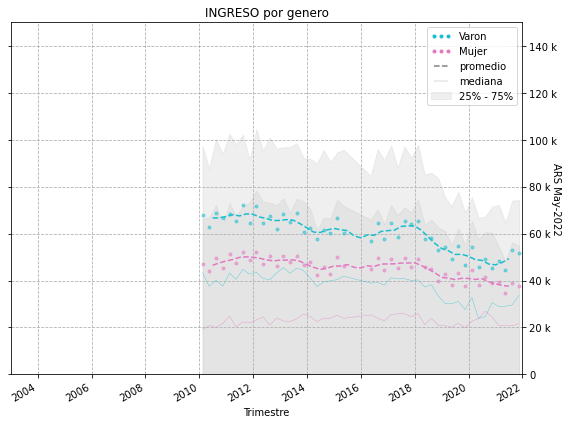

In [115]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## GRUPOS ETARIOS
data = table_P02; 
colors = ['#17becf', '#e377c2']
for i, v in enumerate([1, 2]):
    c = colors[i]
    label = ['Varon', 'Mujer'][i]
    pts, = ax.plot(data[v]['mean'], marker = '.', lw = 0, color = c, alpha = .5, label = label)
    data[v]['median'].plot(ax =ax, color = c, lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    
## Plot Format
ax.set_title('INGRESO por genero') # Titulo
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Varon')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='Mujer')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, meanLine, medianLine, grayPatch], numpoints = 3)

############
plt.tight_layout()
plt.savefig('./../images/ingreso7.png')
plt.show()

In [ ]:
# ['P02', 'CAT_OCUP', 'CAT_INAC', 'INGRESO', 'Grupo_Etario_INDEC', 'PP07K', 'Pobreza', 'Indigencia'
# 'CBA', 'CBT', 'CB_EQUIV', 'P47T_persona', 'P47T_hogar', 'gap_pobreza', 'gap_indigencia']